In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import statsmodels as stats
from scipy import stats
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from xgboost import plot_importance
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

import statsmodels as stats
from scipy import stats
import pandas as pd
import os

from sklearn.model_selection import train_test_split
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# y = Y_OBP
import numpy as np
import re 
import matplotlib.pyplot as plt
import statsmodels as stats
from scipy import stats
import pandas as pd
import os
import numpy as np
import re 
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import sklearn
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor, plot_importance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from itertools import combinations
from tqdm import tqdm
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

from lightgbm import LGBMRegressor, plot_importance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import re
from sklearn.svm import SVR

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df_pa70 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/data/PA70이상.csv',encoding='utf-8',index_col=0)

In [5]:
df_pa70

,PCODE,GYEAR,GAMENUM,T_ID,POSITION,AGE_VA,MONEY,PA_1,AB_1,R_1,H_1,2B_1,3B_1,HR_1,RBI_1,SB_1,CS_1,BB_1,HBP_1,SO_1,GDP_1,AVG_1,BARREL_1,BARREL_SUM_1,OBP_1,SLG_1,OPS_1,PA_2,AB_2,R_2,H_2,2B_2,3B_2,HR_2,RBI_2,SB_2,CS_2,BB_2,HBP_2,SO_2,GDP_2,AVG_2,BARREL_2,BARREL_SUM_2,OBP_2,SLG_2,OPS_2,PA_3,AB_3,R_3,H_3,2B_3,3B_3,HR_3,RBI_3,SB_3,CS_3,BB_3,HBP_3,SO_3,GDP_3,AVG_3,BARREL_3,BARREL_SUM_3,OBP_3,SLG_3,OPS_3,Y_SLG,Y_OBP
5,60558,2019,123.0,2.0,0.0,27.0,8000.0,110,91,17,22,4,0,1,7,4,1,14,2,18,1,0.186813,0.196721,12,0.355140,0.318681,0.673822,49,47,13,11,2,0,0,6,3,0,1,0,9,1,0.276596,0.031250,1,0.244898,0.276596,0.521494,65,62,18,25,6,0,3,11,3,0,3,0,10,1,0.290323,0.282051,11,0.430769,0.645161,1.075931,0.416667,0.333333
10,61102,2018,132.0,3.0,3.0,25.0,18500.0,80,76,4,13,2,0,0,4,0,0,3,1,14,3,0.052632,0.071429,3,0.212500,0.197368,0.409868,73,66,7,18,5,0,2,8,0,0,4,3,12,4,0.106061,0.153846,6,0.342466,0.439394,0.781860,70,66,9,23,6,0,5,14,0,0,2,2,9,3,0.136364,0.265306,13,0.385714,0.666667,1.052381,0.494382,0.377551
12,61102,2020,137.0,3.0,3.0,27.0,23000.0,73,64,7,15,2,0,2,12,1,1,5,3,14,2,0.109375,0.195122,8,0.315068,0.359375,0.674443,88,81,12,28,5,0,2,19,0,0,3,3,14,2,0.148148,0.200000,11,0.386364,0.481481,0.867845,83,79,8,20,2,0,3,13,0,0,2,2,19,4,0.101266,0.294118,15,0.289157,0.392405,0.681562,0.351145,0.333333
13,61186,2018,112.0,3.0,1.0,29.0,8000.0,73,65,10,26,4,1,1,11,2,1,7,0,10,0,0.153846,0.194444,7,0.458333,0.538462,0.996795,85,78,12,26,4,0,0,4,4,2,7,0,15,1,0.153846,0.136364,6,0.388235,0.384615,0.772851,68,62,13,24,3,0,1,9,1,1,5,0,7,2,0.209677,0.100000,5,0.426471,0.483871,0.910342,0.386364,0.370000
14,61186,2019,138.0,3.0,1.0,30.0,15000.0,117,102,9,27,3,0,1,10,5,5,13,0,19,2,0.088235,0.147059,10,0.347826,0.323529,0.671355,119,105,14,34,8,0,0,8,1,3,13,1,7,3,0.133333,0.146667,11,0.403361,0.400000,0.803361,81,75,17,25,3,1,0,4,4,1,3,2,17,1,0.226667,0.142857,7,0.375000,0.400000,0.775000,0.277778,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,50165,2020,117.0,3.0,0.0,25.0,300000.0,91,80,16,30,5,0,10,21,0,0,10,1,18,0,0.200000,0.464286,26,0.450549,0.812500,1.263049,87,74,5,21,3,0,3,12,0,0,10,0,24,0,0.067568,0.319149,15,0.356322,0.445946,0.802268,101,89,16,24,4,0,6,13,0,0,9,2,27,3,0.179775,0.310345,18,0.346535,0.516854,0.863389,0.545455,0.321739
524,50506,2020,144.0,4.0,0.0,28.0,300000.0,93,81,9,17,4,0,4,17,2,0,7,2,15,2,0.111111,0.155172,9,0.282609,0.407407,0.690016,95,86,14,29,5,1,0,12,4,0,7,0,11,2,0.162791,0.128571,9,0.378947,0.418605,0.797552,87,77,12,25,4,0,2,13,1,0,9,0,6,4,0.155844,0.089286,5,0.390805,0.454545,0.845350,0.329193,0.329843
525,50854,2020,127.0,7.0,1.0,22.0,2700.0,18,18,2,6,1,1,0,0,0,0,0,0,3,0,0.111111,0.250000,2,0.333333,0.500000,0.833333,103,92,13,29,4,0,0,1,3,0,9,0,12,2,0.141304,0.125000,7,0.376238,0.358696,0.734933,107,95,11,20,3,0,1,9,6,2,7,2,19,0,0.115789,0.037736,2,0.276190,0.273684,0.549875,0.291429,0.276596
526,50923,2020,136.0,5.0,1.0,29.0,800000.0,88,78,11,21,2,1,5,18,4,1,7,3,26,0,0.141026,0.163265,8,0.352273,0.512821,0.865093,91,82,22,27,4,2,8,26,4,1,6,3,23,2,0.268293,0.314815,17,0.395604,0.719512,1.115117,94,87,18,23,4,2,5,19,4,0,5,1,29,3,0.206897,0.169811,9,0.308511,0.528736,0.837246,0.514124,0.341463


In [6]:
df_slg = df_pa70[df_pa70['Y_SLG']>=0.3]

In [7]:
X = df_slg.drop(['Y_SLG','Y_OBP'],axis=1)
Y = df_slg['Y_SLG']

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=11)

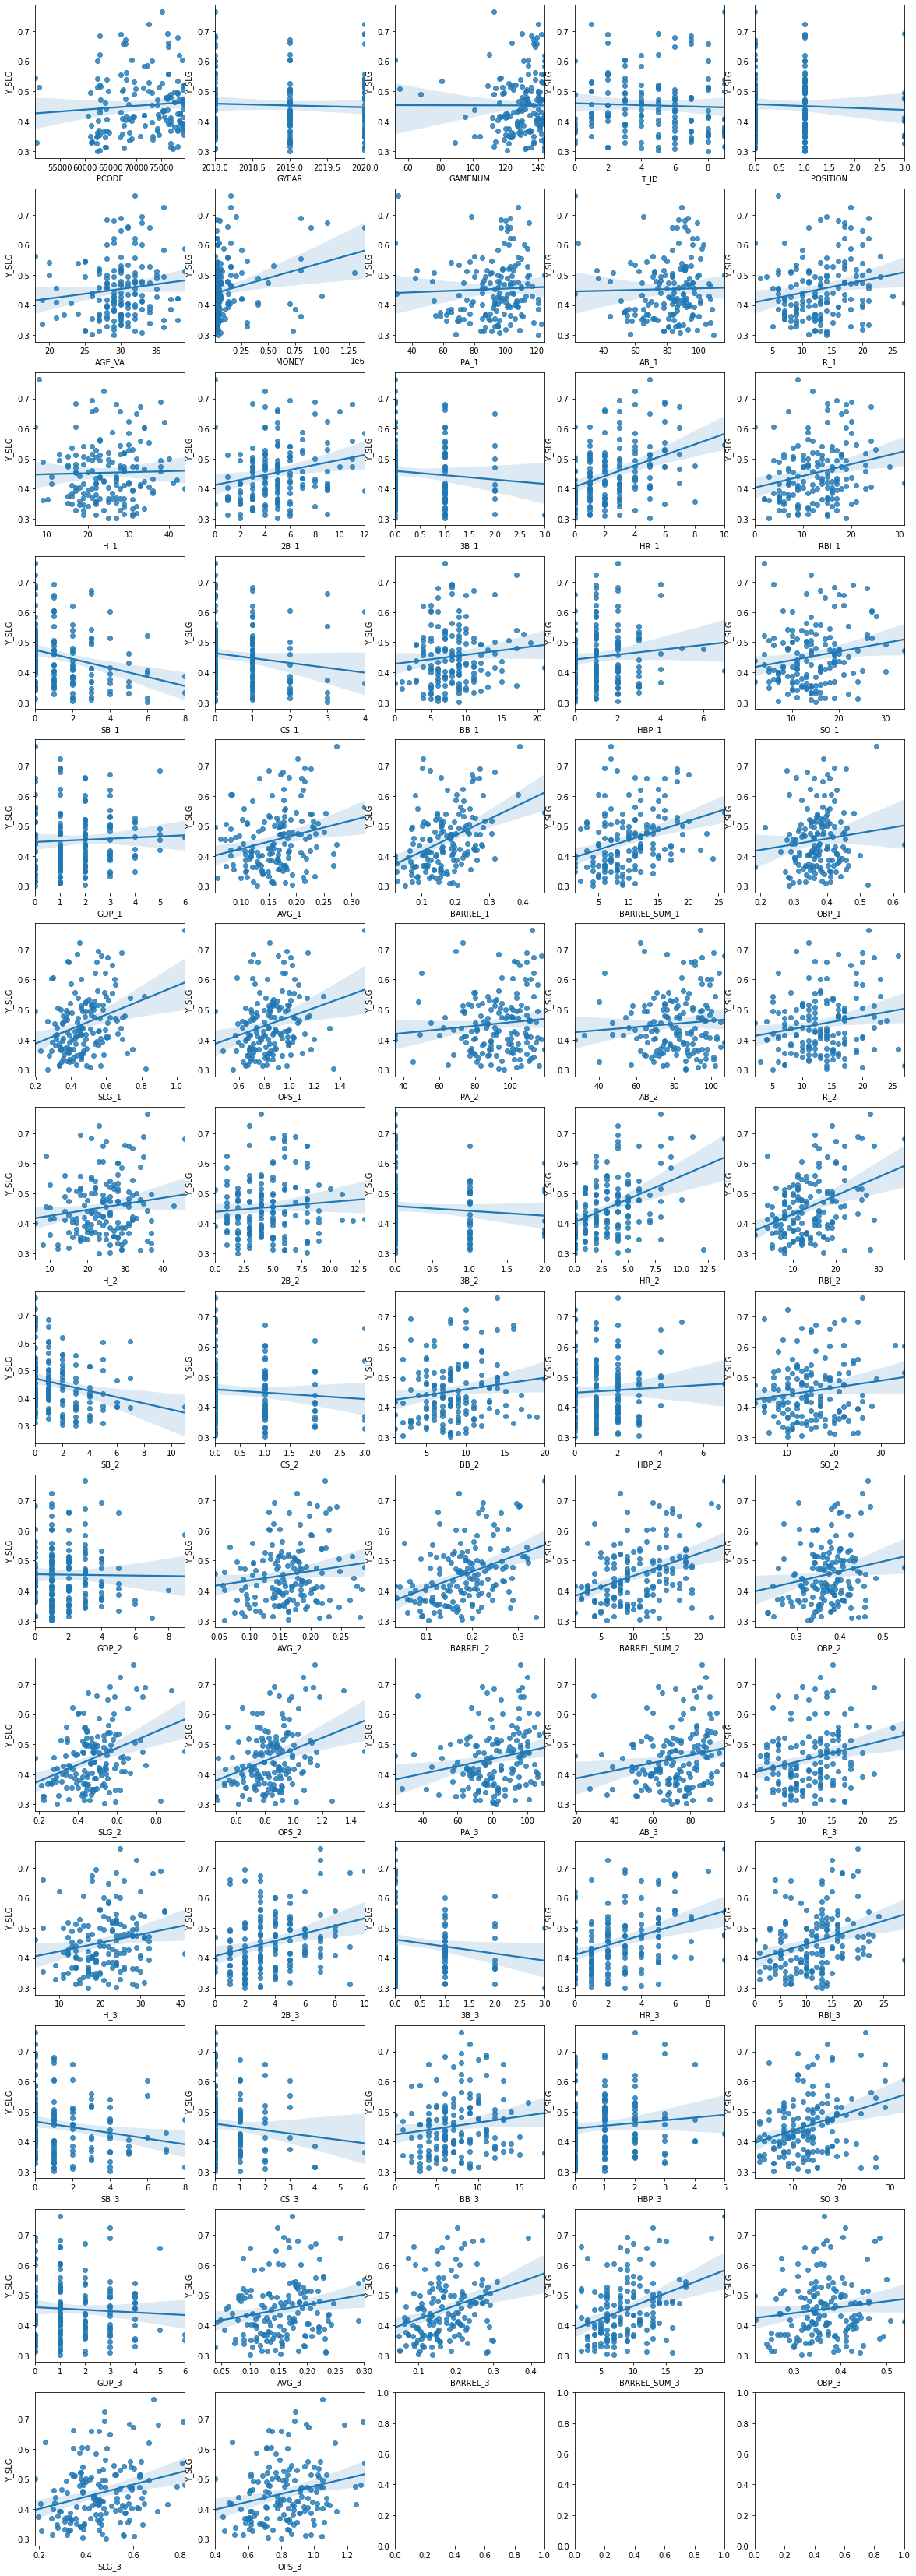

In [14]:
import seaborn as sns
from scipy import stats

fig, axs = plt.subplots(figsize=(20,60), ncols=5, nrows=14)
lm_features = X.columns

for i, feature in enumerate(lm_features):
    row = int(i//5)
    col = i%5
    sns.regplot(x=feature, y='Y_SLG', data=df_obp, ax=axs[row][col])
plt.show()

In [8]:
kfold = KFold(n_splits=3, shuffle=True)

In [16]:
def gridsearchLGBM(model,x_train,y_train):
    
    param_grid={
        'n_estimaotrs':[5000,10000,50000,100000,150000],
        'learning_rate':[0.01,0.05,0.1],
        'max_depth':[-1,4,6,8],
        'num_leaves':[7,15,30,60,250],
        'lambda_l1' : [0,1,1.5],
        'lamda_l2' : [0,1]
    }

    grid=GridSearchCV(model, param_grid=param_grid, scoring=make_scorer(mean_squared_error),cv=2,verbose=1, n_jobs=-1 )
    grid_result = grid.fit(x_train, y_train)
    print('#'*30)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)
    print('#'*30)
    return grid_result.best_params_




def gridsearchXGB(model,x_train,y_train):
    
    param_grid={
        'colsample_bytree':[0.6,1],
        'max_depth':[-1,4,8],
        'learning_rate':[0.01,0.1],
        'n_estimators':[1000,10000,50000],
        'subsample': [0.6,1],
    }

    grid=GridSearchCV(model, param_grid=param_grid,scoring=make_scorer(mean_squared_error),cv=2,verbose=1, n_jobs=-1 )
    grid_result = grid.fit(x_train, y_train)
    print('#'*30)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)
    print('#'*30)
    return grid_result.best_params_



def gridsearchRNSC(model, x_train, y_train):
    
    param_grid={
        'max_trials':[100,1000,10000,100000],
        'min_samples':[0.1,0.2,0.3,0.4]
    }

    grid=GridSearchCV(model, param_grid=param_grid, scoring='r2',verbose=1, n_jobs=-1 )
    grid_result = grid.fit(x_train, y_train)
    print('#'*30)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)
    print('#'*30)
    return grid_result.best_params_


def gridsearchRidgeLasso(model, x_train, y_train):
    
    param_grid={
        'alpha':[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,10,25,50,75,100,500,1000,10000,100000,250000,500000]
    }

    grid=GridSearchCV(model, param_grid=param_grid, scoring='r2',verbose=1, n_jobs=-1 )
    grid_result = grid.fit(x_train, y_train)
    print('#'*30)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)
    print('#'*30)
    return grid_result.best_params_


def gridsearchElasticNet(model, x_train, y_train):
    
    param_grid={
        'alpha':[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,10,100,500,1000,10000,100000],
        'l1_ratio':[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,10,100,500,1000,10000,100000]
    }

    grid=GridSearchCV(model, param_grid=param_grid, scoring='r2',verbose=1, n_jobs=-1 )
    grid_result = grid.fit(x_train, y_train)
    print('#'*30)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)
    print('#'*30)
    return grid_result.best_params_


def gridsearchSVR(model, x_train, y_train):
    
    param_grid={
        'C': [0.1,1],
        'gamma': [1,0.1,0.01],
        'kernel': ['rbf', 'poly'], 
        'degree':[2,3,4]
    }
    grid=GridSearchCV(model, param_grid=param_grid, scoring=make_scorer(mean_squared_error),cv=2,verbose=1, n_jobs=-1 )
    grid_result = grid.fit(x_train, y_train)
    print('#'*30)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)
    print('#'*30)
    return grid_result.best_params_


In [10]:
feature = X
label = Y

In [11]:
def evaluate(feature, label):
    cv_accuracy=[]
    n_iter=0
    for train_index, test_index in kfold.split(feature):  # feautres 데이터를 위에서 지정한 kfold 숫자로 분할
      x_train, x_test = feature.iloc[train_index], feature.iloc[test_index]
      y_train, y_test = label.iloc[train_index], label.iloc[test_index]
      model = LGBMRegressor(n_estimaotrs = 100000, learning_rate= 0.04, max_depth= 14, num_leaves= 12,objective='regression')
      #model.fit(x_train.to_numpy(), y_train.to_numpy())


      grid_result=gridsearchLGBM(model,x_train,y_train)
      model = LGBMRegressor(n_estimaotrs=grid_result['n_estimaotrs'],
                learning_rate=grid_result['learning_rate'],
                max_depth=grid_result['max_depth'],
                num_leaves = grid_result['num_leaves'],
                lambda_l1= grid_result['num_leaves'],
                lamda_l2= grid_result['lamda_l2']
                )
      model.fit(x_train, y_train)

      pred = model.predict(x_test)

      mse = mean_squared_error(y_test,pred)
      rmse = np.sqrt(mse)
      r2 = r2_score(y_test, pred)

      n_iter += 1
    
      train_size = x_train.shape[0]
      test_size = x_test.shape[0]
    
      print('\n#{0} rmse : {1}, r2: {2}, 학습 데이터 크기 : {3},  검증 데이터 크기 : {4}'
          .format(n_iter, rmse, r2, train_size, test_size))
      print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
      cv_accuracy.append(rmse)
    
    print('\n## 평균 rmse:', np.mean(cv_accuracy))






 

In [12]:
def evaluate2(feature, label):
  
  cv_accuracy=[]
  n_iter=0
  for train_index, test_index in kfold.split(feature):  # feautres 데이터를 위에서 지정한 kfold 숫자로 분할
    x_train, x_test = feature.iloc[train_index], feature.iloc[test_index]
    y_train, y_test = label.iloc[train_index], label.iloc[test_index]
  
    model = XGBRegressor()
    #model.fit(x_train.to_numpy(), y_train.to_numpy())

    grid_result=gridsearchXGB(model,x_train,y_train)
    model = XGBRegressor(colsample_bytree = grid_result['colsample_bytree'],
                        max_depth = grid_result['max_depth'],
                        learning_rate=grid_result['learning_rate'],
                        n_estimators=grid_result['n_estimators'],
                        subsample=grid_result['subsample']
                        )
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    n_iter += 1
  
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
  
    print('\n#{0} rmse : {1}, r2: {2}, 학습 데이터 크기 : {3},  검증 데이터 크기 : {4}'
        .format(n_iter, rmse, r2, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(rmse)
  
  print('\n## 평균 rmse:', np.mean(cv_accuracy))

In [ ]:
evaluate(feature, label)

Fitting 2 folds for each of 1800 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1402 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 3402 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   50.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


##############################
Best Score:  0.009218718232024768
Best Params:  {'lambda_l1': 0, 'lamda_l2': 0, 'learning_rate': 0.1, 'max_depth': -1, 'n_estimaotrs': 5000, 'num_leaves': 7}
##############################

#1 rmse : 0.10813409356461466, r2: -0.007545556135789111, 학습 데이터 크기 : 104,  검증 데이터 크기 : 53
#1 검증 세트 인덱스 : [  0   4   9  13  14  15  20  22  28  34  36  40  41  43  49  51  53  58
  64  69  70  72  76  78  80  89  93  96  98  99 101 103 104 105 116 117
 118 123 126 129 133 134 136 138 144 146 147 149 150 151 152 155 156]
Fitting 2 folds for each of 1800 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   47.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


##############################
Best Score:  0.009927526622442607
Best Params:  {'lambda_l1': 1.5, 'lamda_l2': 0, 'learning_rate': 0.01, 'max_depth': -1, 'n_estimaotrs': 5000, 'num_leaves': 7}
##############################

#2 rmse : 0.1003354943841367, r2: -0.03806732002374935, 학습 데이터 크기 : 105,  검증 데이터 크기 : 52
#2 검증 세트 인덱스 : [  1   2   3  10  17  18  19  21  23  24  25  29  30  31  32  37  38  42
  50  52  54  55  60  63  65  67  71  73  74  79  81  82  85  86  87  88
  90 110 112 113 114 115 119 122 125 130 139 140 141 143 148 153]
Fitting 2 folds for each of 1800 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   47.1s


##############################
Best Score:  0.01211135340621448
Best Params:  {'lambda_l1': 0, 'lamda_l2': 0, 'learning_rate': 0.1, 'max_depth': -1, 'n_estimaotrs': 5000, 'num_leaves': 7}
##############################

#3 rmse : 0.09078941830345863, r2: -0.11068884170158699, 학습 데이터 크기 : 105,  검증 데이터 크기 : 52
#3 검증 세트 인덱스 : [  5   6   7   8  11  12  16  26  27  33  35  39  44  45  46  47  48  56
  57  59  61  62  66  68  75  77  83  84  91  92  94  95  97 100 102 106
 107 108 109 111 120 121 124 127 128 131 132 135 137 142 145 154]

## 평균 rmse: 0.09975300208407001


[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   48.3s finished


In [ ]:
evaluate2(feature, label)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  3.2min finished


[17:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
##############################
Best Score:  0.011052295481237458
Best Params:  {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 50000, 'subsample': 1}
##############################
[17:47:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

#1 rmse : 0.10044214666292013, r2: 0.1038287296231385, 학습 데이터 크기 : 104,  검증 데이터 크기 : 53
#1 검증 세트 인덱스 : [  0   1   4   5   7  16  18  19  25  26  30  31  34  38  39  42  46  52
  55  58  59  61  62  66  70  72  80  83  84  87  88  93  95  96  97  99
 107 108 113 115 117 119 128 129 131 133 136 139 140 146 151 154 155]
Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  3.2min finished


[17:50:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
##############################
Best Score:  0.012540186947116104
Best Params:  {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 50000, 'subsample': 1}
##############################
[17:50:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

#2 rmse : 0.11024157367909554, r2: -0.08836931003423265, 학습 데이터 크기 : 105,  검증 데이터 크기 : 52
#2 검증 세트 인덱스 : [  9  12  14  15  17  23  24  32  33  35  36  43  47  49  51  53  60  64
  67  73  74  77  78  82  85  89  91  94  98 100 102 104 105 106 114 116
 120 123 124 125 126 127 134 135 137 141 144 145 147 148 149 150]
Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  3.2min finished


[17:54:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
##############################
Best Score:  0.01323635124917517
Best Params:  {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 50000, 'subsample': 1}
##############################
[17:54:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

#3 rmse : 0.09533891561463295, r2: -0.41560115104813833, 학습 데이터 크기 : 105,  검증 데이터 크기 : 52
#3 검증 세트 인덱스 : [  2   3   6   8  10  11  13  20  21  22  27  28  29  37  40  41  44  45
  48  50  54  56  57  63  65  68  69  71  75  76  79  81  86  90  92 101
 103 109 110 111 112 118 121 122 130 132 138 142 143 152 153 156]

## 평균 rmse: 0.10200754531888286


In [13]:
def evaluate4(feature, label):
  cv_accuracy=[]
  n_iter=0
  for train_index, test_index in kfold.split(feature):  # feautres 데이터를 위에서 지정한 kfold 숫자로 분할
    x_train, x_test = feature.iloc[train_index], feature.iloc[test_index]
    y_train, y_test = label.iloc[train_index], label.iloc[test_index]
  
    model = RANSACRegressor()
    #model.fit(x_train.to_numpy(), y_train.to_numpy())

    grid_result=gridsearchRNSC(model,x_train,y_train)
    model = RANSACRegressor(LinearRegression(),
                            max_trials = 100,
                            min_samples = 0.3,
                            loss='absolute_loss'
                        )
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    n_iter += 1
  
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
  
    print('###RANSAC###')
    print('\n#{0} rmse : {1}, r2: {2}, 학습 데이터 크기 : {3},  검증 데이터 크기 : {4}'
        .format(n_iter, rmse, r2, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(rmse)
  
  print('\n## 평균 rmse:', np.mean(cv_accuracy))


  cv_accuracy=[]
  n_iter=0
  for train_index, test_index in kfold.split(feature):  # feautres 데이터를 위에서 지정한 kfold 숫자로 분할
    x_train, x_test = feature.iloc[train_index], feature.iloc[test_index]
    y_train, y_test = label.iloc[train_index], label.iloc[test_index]
  
    model = Ridge()
    #model.fit(x_train.to_numpy(), y_train.to_numpy())

    grid_result=gridsearchRidgeLasso(model,x_train,y_train)
    model = Ridge(alpha=grid_result['alpha']
                        )
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    n_iter += 1
  
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
  
    print('###RIDGE###')
    print('\n#{0} rmse : {1}, r2: {2}, 학습 데이터 크기 : {3},  검증 데이터 크기 : {4}'
        .format(n_iter, rmse, r2, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(rmse)
  
  print('\n## 평균 rmse:', np.mean(cv_accuracy))

  cv_accuracy=[]
  n_iter=0
  for train_index, test_index in kfold.split(feature):  # feautres 데이터를 위에서 지정한 kfold 숫자로 분할
    x_train, x_test = feature.iloc[train_index], feature.iloc[test_index]
    y_train, y_test = label.iloc[train_index], label.iloc[test_index]
  
    model = Lasso()
    #model.fit(x_train.to_numpy(), y_train.to_numpy())

    grid_result=gridsearchRidgeLasso(model,x_train,y_train)
    model = Lasso(alpha=grid_result['alpha']
                        )
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    n_iter += 1
  
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
  
    print('###Lasso###')
    print('\n#{0} rmse : {1}, r2: {2}, 학습 데이터 크기 : {3},  검증 데이터 크기 : {4}'
        .format(n_iter, rmse, r2, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(rmse)
  
  print('\n## 평균 rmse:', np.mean(cv_accuracy))

  cv_accuracy=[]
  n_iter=0
  for train_index, test_index in kfold.split(feature):  # feautres 데이터를 위에서 지정한 kfold 숫자로 분할
    x_train, x_test = feature.iloc[train_index], feature.iloc[test_index]
    y_train, y_test = label.iloc[train_index], label.iloc[test_index]
  
    model = ElasticNet()
    #model.fit(x_train.to_numpy(), y_train.to_numpy())

    grid_result=gridsearchElasticNet(model,x_train,y_train)
    model = ElasticNet(alpha=grid_result['alpha'], l1_ratio=grid_result['l1_ratio']
                        )
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    n_iter += 1
  
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
  
    print('###ElasticNet###')
    print('\n#{0} rmse : {1}, r2: {2}, 학습 데이터 크기 : {3},  검증 데이터 크기 : {4}'
        .format(n_iter, rmse, r2, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(rmse)
  
  print('\n## 평균 rmse:', np.mean(cv_accuracy))



In [21]:
#회귀
evaluate4(feature, label)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  9.5min finished


##############################
Best Score:  -3.270057578458654
Best Params:  {'max_trials': 100, 'min_samples': 0.3}
##############################
###RANSAC###

#1 rmse : 5.1080290621133955, r2: -3106.670244357979, 학습 데이터 크기 : 104,  검증 데이터 크기 : 53
#1 검증 세트 인덱스 : [  3   6   9  13  16  17  21  28  33  34  35  36  37  40  45  47  50  55
  57  58  63  64  66  68  74  76  80  85  88  91  92  94  95  96  98 100
 107 110 111 116 120 121 123 127 128 130 132 134 136 137 144 147 156]
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  5.6min finished


##############################
Best Score:  -1.5829967911925782
Best Params:  {'max_trials': 100, 'min_samples': 0.1}
##############################
###RANSAC###

#2 rmse : 0.6145741243383056, r2: -37.241531090434734, 학습 데이터 크기 : 105,  검증 데이터 크기 : 52
#2 검증 세트 인덱스 : [  1   2   4   8  11  12  14  15  18  19  22  25  27  31  39  46  49  51
  52  53  54  56  61  62  69  71  72  77  79  87  89  93 101 104 105 109
 114 117 118 119 122 124 125 126 139 141 142 145 146 151 152 153]
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  7.8min finished


##############################
Best Score:  -3.0092485843918877
Best Params:  {'max_trials': 1000, 'min_samples': 0.3}
##############################
###RANSAC###

#3 rmse : 0.17473613455899242, r2: -1.8216067124058037, 학습 데이터 크기 : 105,  검증 데이터 크기 : 52
#3 검증 세트 인덱스 : [  0   5   7  10  20  23  24  26  29  30  32  38  41  42  43  44  48  59
  60  65  67  70  73  75  78  81  82  83  84  86  90  97  99 102 103 106
 108 112 113 115 129 131 133 135 138 140 143 148 149 150 154 155]

## 평균 rmse: 1.9657797736702314
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


##############################
Best Score:  -0.012541915329124942
Best Params:  {'alpha': 10000}
##############################
###RIDGE###

#1 rmse : 0.07913636987213343, r2: 0.025064485547150128, 학습 데이터 크기 : 104,  검증 데이터 크기 : 53
#1 검증 세트 인덱스 : [  2   8   9  10  12  14  15  21  22  23  25  26  27  28  32  33  35  41
  47  50  56  59  63  77  78  79  81  85  86  99 101 103 112 115 118 119
 123 124 125 129 130 131 133 134 144 145 146 147 148 150 151 155 156]
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


##############################
Best Score:  -0.048266911711140704
Best Params:  {'alpha': 10000}
##############################
###RIDGE###

#2 rmse : 0.09739542562250492, r2: 0.18272792860563203, 학습 데이터 크기 : 105,  검증 데이터 크기 : 52
#2 검증 세트 인덱스 : [  3   5   6  11  17  20  29  34  36  37  39  40  45  46  48  51  53  55
  57  60  61  62  65  68  69  70  71  73  82  83  88  90  92  95  97 100
 108 109 113 114 117 120 121 126 127 135 137 138 140 142 143 152]
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


##############################
Best Score:  -0.08776944255757087
Best Params:  {'alpha': 500000}
##############################
###RIDGE###

#3 rmse : 0.09915902965916407, r2: 0.06249379326679372, 학습 데이터 크기 : 105,  검증 데이터 크기 : 52
#3 검증 세트 인덱스 : [  0   1   4   7  13  16  18  19  24  30  31  38  42  43  44  49  52  54
  58  64  66  67  72  74  75  76  80  84  87  89  91  93  94  96  98 102
 104 105 106 107 110 111 116 122 128 132 136 139 141 149 153 154]

## 평균 rmse: 0.09189694171793412
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


##############################
Best Score:  -0.038679243124188
Best Params:  {'alpha': 1000}
##############################
###Lasso###

#1 rmse : 0.09902967958423312, r2: 0.0713153797894075, 학습 데이터 크기 : 104,  검증 데이터 크기 : 53
#1 검증 세트 인덱스 : [  0   5   7   8  13  14  16  20  21  22  24  25  26  31  33  34  35  42
  45  46  47  48  50  52  54  63  67  71  72  78  81  87  89  95  97  99
 105 106 111 113 115 116 122 128 131 133 134 140 145 147 148 152 154]
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


##############################
Best Score:  0.07652804903979823
Best Params:  {'alpha': 0.05}
##############################
###Lasso###

#2 rmse : 0.09521490814437535, r2: -0.11067428296031512, 학습 데이터 크기 : 105,  검증 데이터 크기 : 52
#2 검증 세트 인덱스 : [  1   4   6   9  10  15  18  23  30  38  39  40  49  56  57  58  59  61
  65  66  68  74  75  76  80  83  84  85  88  90  93  94  98 102 109 110
 112 114 117 123 125 130 135 138 139 142 144 146 149 150 151 155]
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


##############################
Best Score:  -0.08174459805393472
Best Params:  {'alpha': 0.05}
##############################
###Lasso###

#3 rmse : 0.09406704588993832, r2: 0.16385697474014815, 학습 데이터 크기 : 105,  검증 데이터 크기 : 52
#3 검증 세트 인덱스 : [  2   3  11  12  17  19  27  28  29  32  36  37  41  43  44  51  53  55
  60  62  64  69  70  73  77  79  82  86  91  92  96 100 101 103 104 107
 108 118 119 120 121 124 126 127 129 132 136 137 141 143 153 156]

## 평균 rmse: 0.09610387787284892
Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


##############################
Best Score:  0.18970556194053428
Best Params:  {'alpha': 10, 'l1_ratio': 0.0001}
##############################
###ElasticNet###

#1 rmse : 0.10615371567636131, r2: 0.006632500023480259, 학습 데이터 크기 : 104,  검증 데이터 크기 : 53
#1 검증 세트 인덱스 : [  1   3   5   6   7  10  12  15  16  19  20  25  26  31  37  38  39  40
  42  43  47  49  51  64  66  68  70  75  79  83  87  88  93  95  98 101
 103 108 111 112 116 117 118 122 126 128 132 136 138 139 140 148 150]
Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


##############################
Best Score:  0.0352556168454091
Best Params:  {'alpha': 100000, 'l1_ratio': 0.01}
##############################
###ElasticNet###

#2 rmse : 0.10089740600881468, r2: 0.017252788996112045, 학습 데이터 크기 : 105,  검증 데이터 크기 : 52
#2 검증 세트 인덱스 : [ 13  18  23  24  27  28  29  32  35  36  44  45  55  60  65  67  69  72
  73  74  77  78  80  81  82  84  86  90  92  94  96  97  99 102 105 107
 109 114 115 119 121 125 127 130 133 137 142 146 147 153 155 156]
Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.6s


##############################
Best Score:  -0.08936342885608455
Best Params:  {'alpha': 100000, 'l1_ratio': 0.0005}
##############################
###ElasticNet###

#3 rmse : 0.08394046254131952, r2: 0.06818238385546371, 학습 데이터 크기 : 105,  검증 데이터 크기 : 52
#3 검증 세트 인덱스 : [  0   2   4   8   9  11  14  17  21  22  30  33  34  41  46  48  50  52
  53  54  56  57  58  59  61  62  63  71  76  85  89  91 100 104 106 110
 113 120 123 124 129 131 134 135 141 143 144 145 149 151 152 154]

## 평균 rmse: 0.09699719474216517


[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:    6.6s finished


In [16]:
# df_pa70 칼럼제거 안한거 obp>=0.3
lgb = LGBMRegressor(n_estimaotrs = 5000, learning_rate= 0.01, max_depth= -1, num_leaves= 7,lambda_l1= 1.5, lamda_l2= 0)
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)
mse = mean_squared_error(y_test, lgb_pred)
rmse = mean_squared_error(y_test, lgb_pred, squared=False)
r2score = r2_score(y_test, lgb_pred)
print('LGBM_OBP')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)

LGBM_OBP
MSE: 0.007983320521560193 RMSE: 0.0893494293297959 r2: 0.06070655758518195


In [17]:
# df_pa70 칼럼제거 안한거 obp>=0.3
xgb_reg = XGBRegressor(colsample_bytree=1, max_depth=8, learning_rate= 0.01, n_estimators=50000,
                         subsample=1)
xgb_reg.fit(X_train,y_train)
xgb_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, xgb_pred)
rmse = mean_squared_error(y_test, xgb_pred, squared=False)
r2score = r2_score(y_test, xgb_pred)
print('XGBR_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)

[11:29:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBR_SLG
MSE: 0.0072580266883958775 RMSE: 0.0851940531281138 r2: 0.14604244501138397


In [19]:
from sklearn.linear_model import LinearRegression
# Train model
lr = LinearRegression().fit(X_train, y_train)
lr_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, lr_pred)
rmse = mean_squared_error(y_test, lr_pred, squared=False)
r2score = r2_score(y_test, lr_pred)
print('회귀_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)


회귀_SLG
MSE: 0.02742204844532609 RMSE: 0.16559603994457744 r2: -2.2263956097859956


In [20]:
from sklearn.linear_model import Ridge
# Train model with default alpha=1
ridge = Ridge(alpha=0.6).fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, ridge_pred)
rmse = mean_squared_error(y_test, ridge_pred, squared=False)
r2score = r2_score(y_test, ridge_pred)
print('ridge_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)

ridge_SLG
MSE: 0.01213454855843361 RMSE: 0.11015692696527808 r2: -0.42771442745146904


In [21]:
from sklearn.linear_model import Lasso
# Train model with default alpha=1
lasso = Lasso(alpha=4).fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, lasso_pred)
rmse = mean_squared_error(y_test, lasso_pred, squared=False)
r2score = r2_score(y_test, lasso_pred)
print('lasso_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)


lasso_SLG
MSE: 0.008513396850216615 RMSE: 0.0922680705889996 r2: -0.001660626363107598


In [24]:
from sklearn.svm import SVR
model = SVR(kernel='poly', degree=4)
svr  = model.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, svr_pred)
rmse = mean_squared_error(y_test, svr_pred, squared=False)
r2score = r2_score(y_test, svr_pred)
print('SVR_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)

SVR_SLG
MSE: 0.008525562433305489 RMSE: 0.09233397225997314 r2: -0.0030919922199175165


In [26]:
from sklearn.linear_model import RANSACRegressor

reg = RANSACRegressor(random_state=0).fit(X_train, y_train)
reg_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, reg_pred)
rmse = mean_squared_error(y_test, reg_pred, squared=False)
r2score = r2_score(y_test, reg_pred)
print('RANSAC_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)

RANSAC_SLG
MSE: 0.12015881241258279 RMSE: 0.34663931169528767 r2: -13.137523884038416


In [27]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state=0)
el = regr.fit(X_train, y_train)
el_pred = el.predict(X_test)
mse = mean_squared_error(y_test, el_pred)
rmse = mean_squared_error(y_test, el_pred, squared=False)
r2score = r2_score(y_test, el_pred)
print('SVR_SLG')
print('MSE:',mse,'RMSE:',rmse,'r2:',r2score)

SVR_SLG
MSE: 0.00850734500941374 RMSE: 0.09223526987770861 r2: -0.0009485850057140421
